## Imports

In [1]:
# importing for later use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_telco
import env
import os

## Acquire and Prep Exercises (Workspace)

### Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.


In [19]:
# creating function that returns a path that can be used to connect to SQL database
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [20]:
# pasting functions from earlier so i test if they work with my final function later without importing them from external file
def new_telco_data():
    '''This function reads the telco customer data from the Codeup db into a df, writes it to a csv file and returns the df'''
    sql_query = 'select customer_id, monthly_charges, tenure, total_charges from customers where contract_type_id = 3'
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    df.to_csv('telco_df.csv')
    return df

def get_telco_data(cached=False):
    '''This function reads in mall customer data from Codeup database if cached == False or if cached == True reads in mall customer df from a csv file, returns df'''
    if cached or os.path.isfile('telco_df.csv') == False:
        df = new_telco_data()
    else:
        df = pd.read_csv('telco_df.csv', index_col = 0)
    return df

In [21]:
# saving df to variable for easy access
df = get_telco_data()

### Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [22]:
# viewing first 5 rows
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [23]:
# observing rows and columns count
df.shape

(1695, 4)

In [24]:
# viewing statistical summary
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [25]:
# looking for unfitting data types, total charges should be float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 66.2+ KB


In [26]:
# no nulls but we know total_charges has white space from last project
df.isnull().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [27]:
# removing white spaces
df['total_charges'] = df.total_charges.where((df.tenure != 0),0)

# converting data type to float since we couldnt when there were white space values
df['total_charges'] = df.total_charges.astype(float)

In [28]:
# checking if type change was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


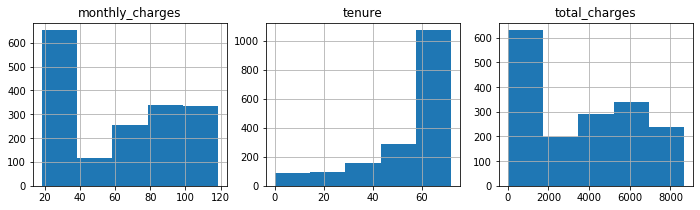

In [29]:
# plotting all columns except customer id since thats not needed
plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

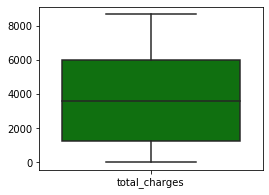

In [36]:
# since monthly charges and tenure have much smaller ranges, if we plot them with total charges
# they will be squished so we'll plot this on its own
# customer id should not be plotted bc it wont give us any meaningful info
plt.figure(figsize=(4,3))
sns.boxplot(color='green',data=df.drop(columns=['customer_id', 'tenure', 'monthly_charges']))

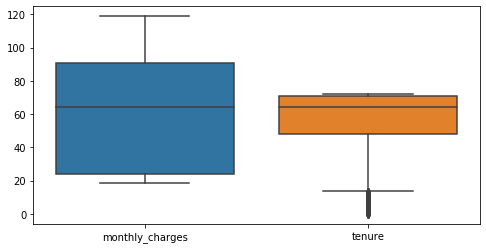

In [31]:
# plotting remaining columns
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['customer_id', 'total_charges']))

### End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [9]:
def wrangle_telco():
    # using get_telco_data() function to retrieve data
    tdf = get_telco_data()
    # replacing white space values with 0
    tdf['total_charges'] = tdf.total_charges.where((tdf.tenure != 0),0)
    # converting data type to float since we couldnt when there were white space values
    tdf['total_charges'] = tdf.total_charges.astype(float)
    return tdf

In [2]:
# saving return of new function to variable
telco_prepped = wrangle_telco()

# checking if data type change took effect, it did
telco_prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [37]:
# viewing data
telco_prepped.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
